In [1]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [1]:
# !wget -O pose_landmarker.task -q https://storage.googleapis.com/mediapipe-models/pose_landmarker/pose_landmarker_heavy/float16/1/pose_landmarker_heavy.task

In [3]:
# Mediapipe 이미지 객체 생성
mp_image = mp.Image.create_from_file('../dataset/squat.jpg')

In [ ]:
#@markdown To better demonstrate the Pose Landmarker API, we have created a set of visualization tools that will be used in this colab. These will draw the landmarks on a detect person, as well as the expected connections between those markers.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image

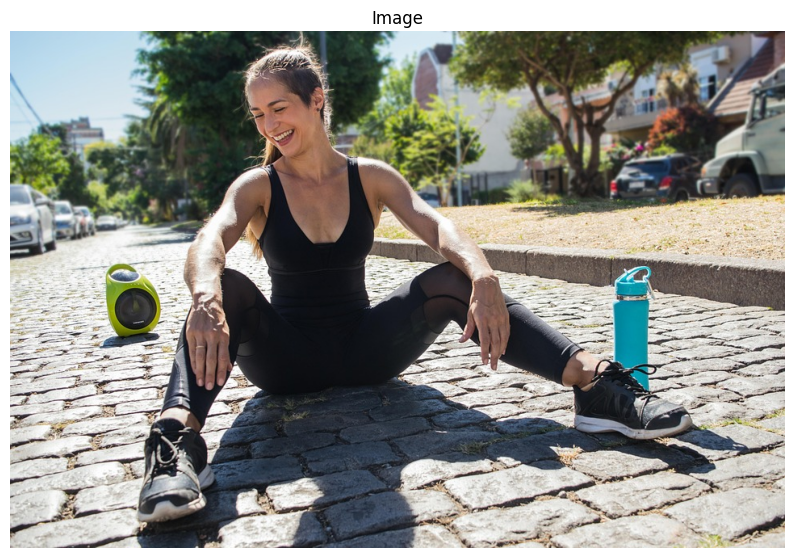

In [6]:
# !wget -q -O image.jpg https://cdn.pixabay.com/photo/2019/03/12/20/39/girl-4051811_960_720.jpg

import cv2

img = cv2.imread("image.jpg")
import matplotlib.pyplot as plt

def safe_imshow(img, title="Image"):
    """Jupyter에서 안전하게 이미지 표시"""
    if img is None:
        print("이미지를 로드할 수 없습니다.")
        return
    
    # BGR을 RGB로 변환
    if len(img.shape) == 3:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        img_rgb = img
    
    plt.figure(figsize=(10, 8))
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# 사용법
img = cv2.imread("image.jpg")
safe_imshow(img)

I0000 00:00:1754983287.338644    1641 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1754983287.351473    2368 gl_context.cc:369] GL version: 3.1 (OpenGL ES 3.1 Mesa 23.2.1-1ubuntu3.1~22.04.3), renderer: D3D12 (NVIDIA GeForce RTX 3060 Ti)
W0000 00:00:1754983287.412830    2372 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1754983287.572785    2382 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


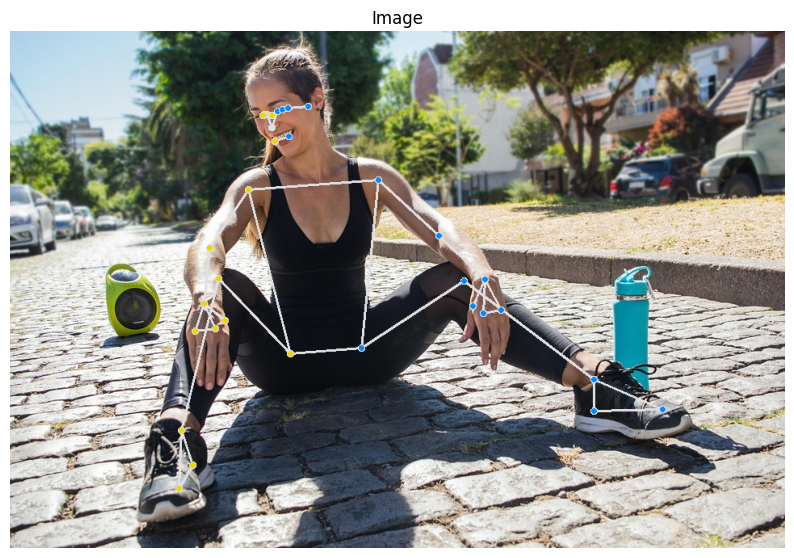

In [10]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file("image.jpg")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
safe_imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


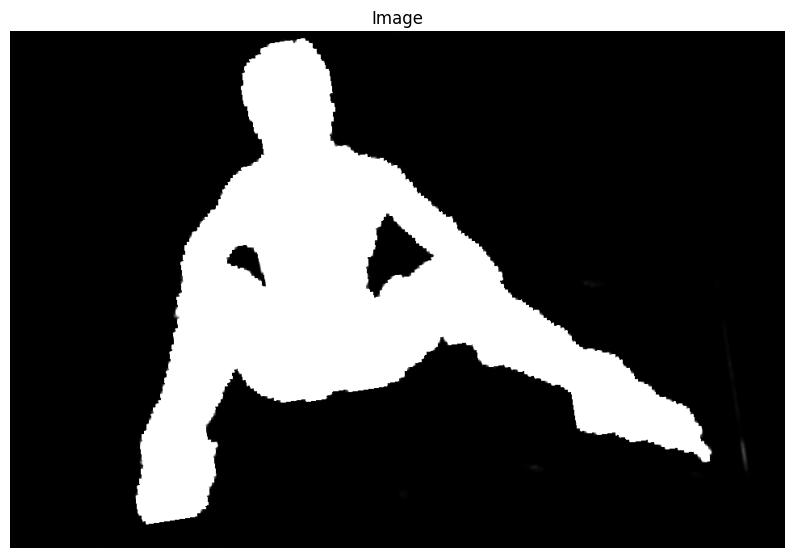

In [12]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
safe_imshow(visualized_mask)

In [23]:
detection_result.pose_world_landmarks

[[Landmark(x=-0.14895981550216675, y=-0.5371623039245605, z=-0.19862280786037445, visibility=1.0, presence=1.0),
  Landmark(x=-0.12557561695575714, y=-0.5684570074081421, z=-0.19339750707149506, visibility=0.9999997615814209, presence=0.9999998807907104),
  Landmark(x=-0.12151647359132767, y=-0.5681011080741882, z=-0.18792536854743958, visibility=0.9999997615814209, presence=0.9999998807907104),
  Landmark(x=-0.12262941151857376, y=-0.5699053406715393, z=-0.18986113369464874, visibility=0.9999997615814209, presence=0.9999998807907104),
  Landmark(x=-0.14473292231559753, y=-0.5753242373466492, z=-0.19750192761421204, visibility=0.9999998807907104, presence=0.9999998807907104),
  Landmark(x=-0.14379733800888062, y=-0.5735636353492737, z=-0.2059754729270935, visibility=0.9999998807907104, presence=0.9999998807907104),
  Landmark(x=-0.1376756876707077, y=-0.5646861791610718, z=-0.18723811209201813, visibility=0.9999998807907104, presence=0.9999998807907104),
  Landmark(x=-0.016872592270374

PoseLandmarkerResult(pose_landmarks=[[NormalizedLandmark(x=0.33806538581848145, y=0.1863548755645752, z=-0.1341806799173355, visibility=1.0, presence=1.0), NormalizedLandmark(x=0.3448467254638672, y=0.15513381361961365, z=-0.11546725034713745, visibility=0.9999997615814209, presence=0.9999998807907104), NormalizedLandmark(x=0.3519415557384491, y=0.1519753336906433, z=-0.11572464555501938, visibility=0.9999997615814209, presence=0.9999998807907104), NormalizedLandmark(x=0.35931211709976196, y=0.14900776743888855, z=-0.1156124696135521, visibility=0.9999997615814209, presence=0.9999998807907104), NormalizedLandmark(x=0.3316265046596527, y=0.16122564673423767, z=-0.10083632916212082, visibility=0.9999998807907104, presence=0.9999998807907104), NormalizedLandmark(x=0.329121470451355, y=0.16214510798454285, z=-0.10121668875217438, visibility=0.9999998807907104, presence=0.9999998807907104), NormalizedLandmark(x=0.3268175721168518, y=0.16278338432312012, z=-0.10130773484706879, visibility=0.